In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from numpy import log
from pandas import Series

In [2]:
df = pd.read_csv("E:\\LEARNBAY\\Projects\\Kaggle\\Time series Forecasting\\Alcohol_Sales.csv")
df.head(1)

,DATE,S4248SM144NCEN
0,1992-01-01,3459


In [3]:
df.isnull().sum()  
#no null data should be there...Time serie sforecasting doesnt admit missing data. -- all data shouldbe continuous.


DATE              0
S4248SM144NCEN    0
dtype: int64

In [4]:
df.rename(columns={'S4248SM144NCEN':'Sales'},inplace=True)

In [5]:
df.info()  #Date is in the object form --- we will need to change it to date time format. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    325 non-null    object
 1   Sales   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [6]:
df['DATE']=pd.to_datetime(df['DATE'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    325 non-null    datetime64[ns]
 1   Sales   325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


#### Setting the index as --date.

In [8]:
df = df.set_index(['DATE'])
df.head(1)

,Sales
DATE,
1992-01-01,3459


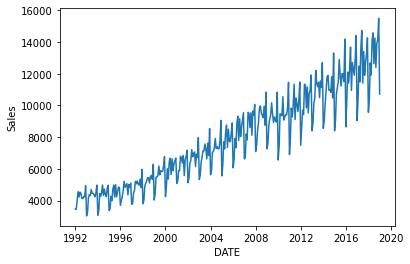

In [9]:
sns.lineplot(data=df['Sales'])
plt.show()

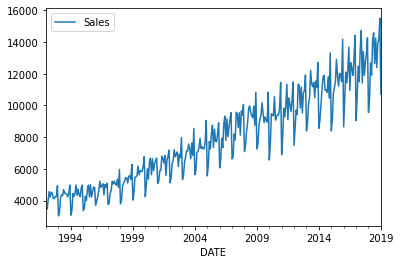

In [10]:
df.plot()
plt.show()

# Decomposition

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

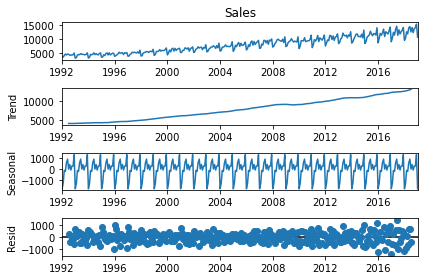

In [14]:
sd = seasonal_decompose(x = df['Sales'], model='additive')
sd.plot()
plt.show()

# DURBIN WATNSON TEST 
to check if the data is linear or has autocorrelation.

In [15]:
import statsmodels.api as sm

sm.stats.durbin_watson(df['Sales'])

0.024760592077720047

Very less than 2...the data is non-linear...that mean it is fit for the TSF. 

###### Autocorrelation exist. 

# Stationay or Non-stationary Dataset

#### Augumented Dickey Fuller Test

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_chk(df):
    labels = ['ADF Stats Test','p-value','# of Lags','# of Observations']
    result = adfuller(df)
    
    for i,j in zip(labels,result):
        print(i,"-",str(j))
    
    if result[1] <= 0.05:
        print("Strong evidence against Null Hypothesis -- TS is Stationary") #p-low, h0 go.
    else:
        print("Weak evidence againsr Null Hypothesis -- TS is NON-Stationary")
   
    
    
adf_chk(df)    

ADF Stats Test - 2.0374047259137082
p-value - 0.9987196267088919
# of Lags - 14
# of Observations - 310
Weak evidence againsr Null Hypothesis -- TS is NON-Stationary


Will have to make the data stationary. Hence, using the lag.

In [18]:
df['1st Lag'] = df['Sales'] - df['Sales'].shift(1)
df.head(2)

,Sales,1st Lag
DATE,,
1992-01-01,3459,NaN
1992-02-01,3458,-1.0


In [21]:
label = ['ADF Stats Test','p-value','# of Lags','# of Observationse']
result = adfuller(df['1st Lag'].dropna())

for i,j in zip(label,result):
    print("{} = {}".format(i,j))
    
if result[1] <=0.005:
    print("Strong evidence against null hypothesis - Data is stationary")
else:
    print("Weak evidence against null hypothesis - Data is non-stationary")

ADF Stats Test = -4.365959619246024
p-value = 0.0003408284921170421
# of Lags = 13
# of Observationse = 310
Strong evidence against null hypothesis - Data is stationary


So, we got stationary data.

# Trend
p =  ?  --Partial autocorrelation
d = 1  --DIfference
q =  ?  --Autocorrelation

# Seasonality

P= ?--Partial autocorrelation
D= ?--Difference
Q= ?--Autocorrelation

In [23]:
#Finding D value for Seasonality. 

df['Seasonality_lag_1'] = df['Sales'] - df['Sales'].shift(12)

label = ['ADF-State-Test Value','p-Value','# of lags','# of Observations']
result = adfuller(df['Seasonality_lag_1'].dropna())

for i, j in zip(label,result):
    print("{} = {}".format(i,j))

if result[1] <= 0.05:
    print("Strong evidence against null hypothesis -- Data is stationary")
else:
    print("Weak evidence against null hypothesis -- Data is non-stationary")

ADF-State-Test Value = -3.33931072966954
p-Value = 0.013210159306746563
# of lags = 13
# of Observations = 299
Strong evidence against null hypothesis -- Data is stationary


In [ ]:
So we get this also as stationary. So we got the value of D.

## Trend
p =  ?  --Partial autocorrelation
d = 1  --DIfference
q =  ?  --Autocorrelation

## Seasonality

P= ?--Partial autocorrelation
D= 1 --Difference
Q= ?--Autocorrelation

Now we need to find out the value of pq and PQ. for the same we will use the graphical method. 

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [26]:
df.head(1)

,Sales,1st Lag,Seasonality_lag_1
DATE,,,
1992-01-01,3459,NaN,NaN


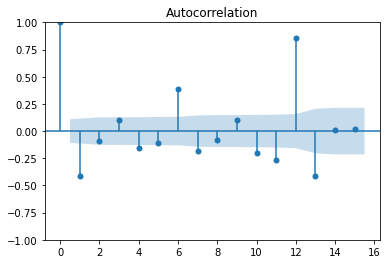

In [27]:
plot_acf(df['1st Lag'].dropna(),lags=15)
plt.show()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


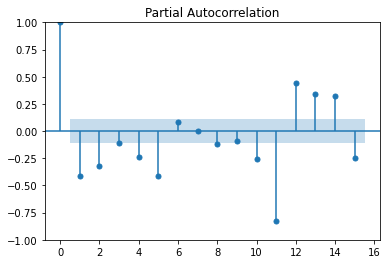

In [28]:
plot_pacf(df['1st Lag'].dropna(),lags=15)
plt.show()

## Trend
p = 5  --Partial autocorrelation
d = 1  --DIfference
q = 1  --Autocorrelation

## Seasonality

P= ?--Partial autocorrelation
D= 1 --Difference
Q= ?--Autocorrelation

In [ ]:
So, we

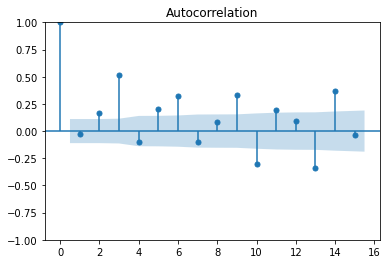

In [29]:
plot_acf(df['Seasonality_lag_1'].dropna(),lags=15)
plt.show()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


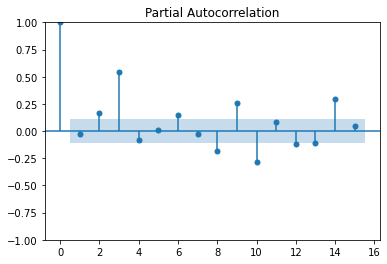

In [30]:
plot_pacf(df['Seasonality_lag_1'].dropna(),lags=15)
plt.show()

In [ ]:
## Trend
p = 5  --Partial autocorrelation
d = 1  --DIfference
q = 1  --Autocorrelation

## Seasonality

P= 0 --Partial autocorrelation
D= 1 --Difference
Q= 0 --Autocorrelation

# Model Building

In [31]:
import statsmodels.api as sm

In [38]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(5,1,1),seasonal_order =(0,1,0,12))
result =model.fit()
result.summary()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  325
Model:             SARIMAX(5, 1, 1)x(0, 1, [], 12)   Log Likelihood               -2261.135
Date:                             Fri, 04 Aug 2023   AIC                           4536.269
Time:                                     05:54:08   BIC                           4562.470
Sample:                                 01-01-1992   HQIC                          4546.741
                                      - 01-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9445      0.237     -3.987      0.000      -1.409      -0.480
ar.L2         -0.6852      0.248     -2.762      0.006      -1.171      -0.199
ar.L3         -0.2028      0.205     -0.987      0.324      -0.605       0.200
ar.L4         -0.2888      0.085     -3.397      0.001      -0.455      -0.122
ar.L5         -0.1995      0.058     -3.439      0.001      -0.313      -0.086
ma.L1         -0.0927      0.255     -0.364      0.716      -0.592       0.406
sigma2      1.165e+05   8169.859     14.265      0.000    1.01e+05    1.33e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                14.13
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.45   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Automating The SARIMAX Model

In [40]:
import itertools

p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]


print(pdq)
print(seasonal_pdq)

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


In [54]:
hld = []

for trendp in pdq:
#     print(trendp)
    for seasonalp in seasonal_pdq:
#         print(seasonalp)
        try: 
#             print("try ytrytyryryuuerywuier ")
            model = sm.tsa.statespace.SARIMAX(df['Sales'],order= trendp,seasonal_order= seasonalp,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            result=model.fit()
#             print("sdfsdfsdfsdfsd ")
            print("{} * {} = {}".format(trendp,seasonalp,result.aic))
            hld.append(result.aic)
        except:
            continue


(0, 0, 0) * (0, 0, 0, 12) = 6778.09107027246
(0, 0, 0) * (0, 0, 1, 12) = 6331.963317842476
(0, 0, 0) * (0, 1, 0, 12) = 4809.545082533588


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 0, 0) * (0, 1, 1, 12) = 4578.714372644711
(0, 0, 0) * (1, 0, 0, 12) = 4653.648596046325
(0, 0, 0) * (1, 0, 1, 12) = 4639.420569929309
(0, 0, 0) * (1, 1, 0, 12) = 4576.885697632243


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 0, 0) * (1, 1, 1, 12) = 4511.323693558632
(0, 0, 1) * (0, 0, 0, 12) = 6407.572194884287


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) * (0, 0, 1, 12) = 5811.412568881971
(0, 0, 1) * (0, 1, 0, 12) = 4765.12086292046


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) * (0, 1, 1, 12) = 4548.150294896956


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 0, 1) * (1, 0, 0, 12) = 4653.28617075315


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

(0, 0, 1) * (1, 0, 1, 12) = 4631.332002941144
(0, 0, 1) * (1, 1, 1, 12) = 4492.813969562305
(0, 1, 0) * (0, 0, 0, 12) = 5563.732974803579
(0, 1, 0) * (0, 0, 1, 12) = 5074.965539064231
(0, 1, 0) * (0, 1, 0, 12) = 4853.430106026535


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 1, 0) * (0, 1, 1, 12) = 4660.2911560136445
(0, 1, 0) * (1, 0, 0, 12) = 4864.274879511922
(0, 1, 0) * (1, 0, 1, 12) = 4825.2009667139


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 1, 0) * (1, 1, 0, 12) = 4684.6973805962825
(0, 1, 0) * (1, 1, 1, 12) = 4651.394685661355
(0, 1, 1) * (0, 0, 0, 12) = 5396.692185915708


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(0, 1, 1) * (0, 0, 1, 12) = 4906.147341746514
(0, 1, 1) * (0, 1, 0, 12) = 4599.291649373095


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) * (0, 1, 1, 12) = 4431.934368819299
(0, 1, 1) * (1, 0, 0, 12) = 4628.222962373628


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) * (1, 0, 1, 12) = 4598.486290770012


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) * (1, 1, 0, 12) = 4460.518350822673


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(0, 1, 1) * (1, 1, 1, 12) = 4404.9241601161475
(1, 0, 0) * (0, 0, 0, 12) = 5580.589288122012


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) * (0, 0, 1, 12) = 5091.001845459694
(1, 0, 0) * (0, 1, 0, 12) = 4759.274242732759


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) * (0, 1, 1, 12) = 4552.404321817203


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) * (1, 0, 0, 12) = 4637.142718887617


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) * (1, 0, 1, 12) = 4639.061498998236
(1, 0, 0) * (1, 1, 0, 12) = 4553.7903918464945


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 0) * (1, 1, 1, 12) = 4505.558423457597
(1, 0, 1) * (0, 0, 0, 12) = 5390.03209540494


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) * (0, 0, 1, 12) = 5058.5941018824715
(1, 0, 1) * (0, 1, 0, 12) = 4634.784280519485


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) * (0, 1, 1, 12) = 4448.182424309018


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

(1, 0, 1) * (1, 0, 0, 12) = 4630.777974747301


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) * (1, 0, 1, 12) = 4608.554887767756
(1, 0, 1) * (1, 1, 0, 12) = 4463.230388808906


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 0, 1) * (1, 1, 1, 12) = 4491.7499392545005
(1, 1, 0) * (0, 0, 0, 12) = 5502.838858660096
(1, 1, 0) * (0, 0, 1, 12) = 5009.439077464629
(1, 1, 0) * (0, 1, 0, 12) = 4716.761460230601


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

(1, 1, 0) * (0, 1, 1, 12) = 4539.528983388342
(1, 1, 0) * (1, 0, 0, 12) = 4716.055889846366


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) * (1, 0, 1, 12) = 4706.896146681245
(1, 1, 0) * (1, 1, 0, 12) = 4543.560787731583


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 0) * (1, 1, 1, 12) = 4520.5285993214975
(1, 1, 1) * (0, 0, 0, 12) = 5397.537000764792


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) * (0, 0, 1, 12) = 4907.79526553778
(1, 1, 1) * (0, 1, 0, 12) = 4573.747046772869


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) * (0, 1, 1, 12) = 4403.5244294585045
(1, 1, 1) * (1, 0, 0, 12) = 4588.969547336061


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) * (1, 0, 1, 12) = 4535.510743513731
(1, 1, 1) * (1, 1, 0, 12) = 4422.214570521839


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


(1, 1, 1) * (1, 1, 1, 12) = 4378.383036008476


In [56]:
min(hld)

4378.383036008476

(1, 1, 1) * (1, 1, 1, 12) = 4378.383036008476 --- parameter for least value. 

In [57]:
model = sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)
result=model.fit()
result.summary()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  325
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -2184.192
Date:                            Fri, 04 Aug 2023   AIC                           4378.383
Time:                                    09:48:42   BIC                           4396.869
Sample:                                01-01-1992   HQIC                          4385.783
                                     - 01-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3615      0.066     -5.491      0.000      -0.491      -0.232
ma.L1         -0.7651      0.042    -18.163      0.000      -0.848      -0.683
ar.S.L12       0.3884      0.121      3.218      0.001       0.152       0.625
ma.S.L12      -0.7532      0.094     -8.021      0.000      -0.937      -0.569
sigma2      1.338e+05   1.07e+04     12.472      0.000    1.13e+05    1.55e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.10   Jarque-Bera (JB):                 2.87
Prob(Q):                              0.15   Prob(JB):                         0.24
Heteroskedasticity (H):               3.83   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### EVALUATION

In [58]:
len(df)

325

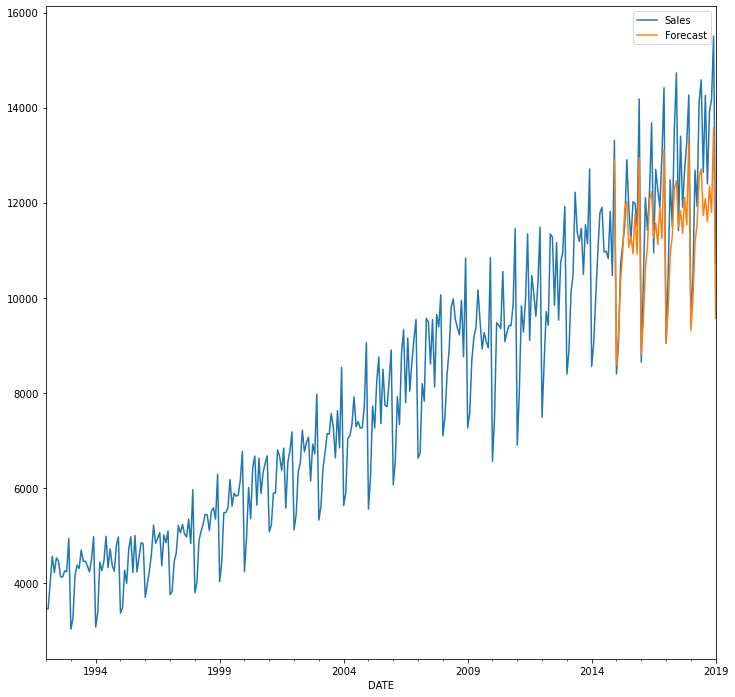

In [65]:
from pylab import rcParams
rcParams['figure.figsize']=(12,12)
df['Forecast']=result.predict(start=275,end=325,dynamic=True)
df[['Sales','Forecast']].plot()
plt.show()

# Prediction

In [68]:
df.head()

,Sales,1st Lag,Seasonality_lag_1,Forecast
DATE,,,,
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,-1.0,NaN,NaN
1992-03-01,4002,544.0,NaN,NaN
1992-04-01,4564,562.0,NaN,NaN
1992-05-01,4221,-343.0,NaN,NaN


In [67]:
df.tail(1)

,Sales,1st Lag,Seasonality_lag_1,Forecast
DATE,,,,
2019-01-01,10718,-4786.0,1154.0,9568.696188


In [71]:
len(df)
# 325/12

325

In [72]:
# 2019 - 02-01 --- 2023-12-01  ::
12+12+12+12+11   --- so we need to predict the alcohol sale for next 59 months. 

59

In [75]:
df.index[-1]

Timestamp('2019-01-01 00:00:00')

In [73]:
from pandas.tseries.offsets import DateOffset

In [76]:
future_date=[df.index[-1] + DateOffset(months= x) for x in range(0,61)]
future_date

[Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-02-01 00:00:00'),
 Timestamp('2020-03-01 00:00:00'),
 Timestamp('2020-04-01 00:00:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-

In [78]:
future_date_df = pd.DataFrame(index=future_date[1:],columns=df.columns)
future_date_df.head(1)

,Sales,1st Lag,Seasonality_lag_1,Forecast
2019-02-01,NaN,NaN,NaN,NaN


In [79]:
predict_df = pd.concat([df,future_date_df])
predict_df.tail()

,Sales,1st Lag,Seasonality_lag_1,Forecast
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN
2024-01-01,NaN,NaN,NaN,NaN


In [80]:
predict_df.head()

,Sales,1st Lag,Seasonality_lag_1,Forecast
1992-01-01,3459,NaN,NaN,NaN
1992-02-01,3458,-1.0,NaN,NaN
1992-03-01,4002,544.0,NaN,NaN
1992-04-01,4564,562.0,NaN,NaN
1992-05-01,4221,-343.0,NaN,NaN


In [81]:
print(len(df))
print(len(predict_df))

325
385


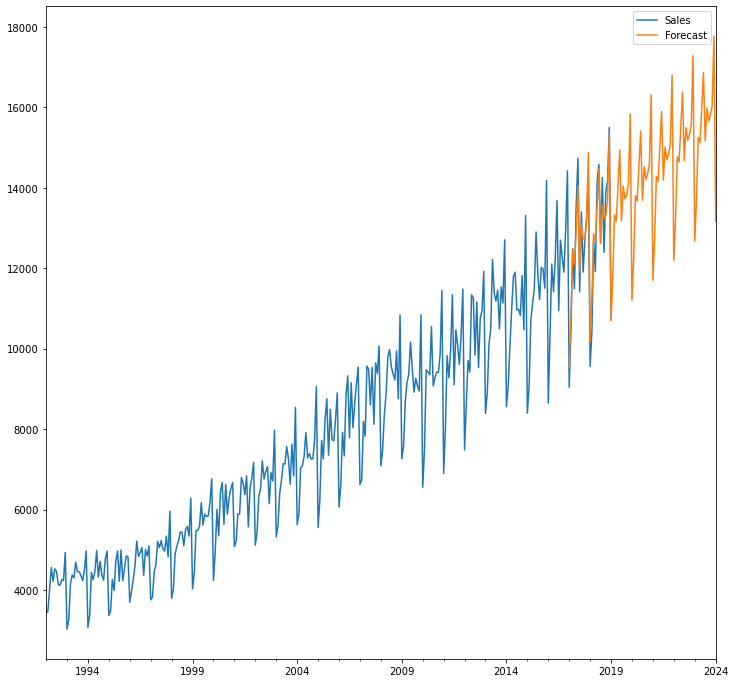

In [84]:
predict_df['Forecast'] = result.predict(start=300,end=385,dynamic=True)
predict_df[['Sales','Forecast']].plot()
plt.show()

In [87]:
predict_df['Forecast'] = round(predict_df['Forecast'],2)
predict_df['Forecast']

1992-01-01         NaN
1992-02-01         NaN
1992-03-01         NaN
1992-04-01         NaN
1992-05-01         NaN
                ...   
2023-09-01    15665.27
2023-10-01    15813.83
2023-11-01    16051.24
2023-12-01    17771.24
2024-01-01    13163.03
Name: Forecast, Length: 385, dtype: float64

In [88]:
predict_df.to_csv("Alcohol_Forecast.csv")

# Done.